## A Starting Notebook for an in-class Churn Activity

## Business Problem

In a telecommunications company, there are promotional costs known as acquisition costs and retention costs. acquisition cost is the cost for a company to acquire new customers. Meanwhile, retention cost is the cost for the company to retain existing customers.

The acquisition cost can be five times greater than the retention cost.

## Analytics Problem

The company would like you to explore their churn data and develop a ML model (Decision Tree Classifier) to predict who will stay and who will leave. You are provided with data for 5000 customers and whether they left or stayed with the company (Churn Value).

## Data Description
7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. (TARGET)

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

In [1]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Set the display options to print the dataframe
# pd.options.display.float_format = '{:,.3f}'.format

### Read and Clean the Data

In [2]:
churn_df = pd.read_csv('Data/Student_Churn_Data.csv')
churn_df.columns = [s.strip().replace(' ', '_') for s in churn_df.columns]
churn_df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value,CLTV
0,0378-TOVMS,1,United States,California,Vernalis,95385,"37.609095, -121.263381",37.609095,-121.263381,Female,...,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.2,1,5641
1,0376-YMCJC,1,United States,California,Novato,94949,"38.067204, -122.524004",38.067204,-122.524004,Male,...,Yes,Yes,No,Month-to-month,Yes,Electronic check,90.60,1943.2,1,4359
2,8938-UMKPI,1,United States,California,Corona,92882,"33.819385, -117.600213",33.819385,-117.600213,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,5127.95,1,4804
3,4439-JMPMT,1,United States,California,Comptche,95427,"39.239818, -123.565432",39.239818,-123.565432,Female,...,Yes,Yes,No,Month-to-month,Yes,Electronic check,85.75,470.95,1,3608
4,9601-BRXPO,1,United States,California,San Diego,92129,"32.961064, -117.134917",32.961064,-117.134917,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.95,2566.5,1,3642


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5000 non-null   object 
 1   Count              5000 non-null   int64  
 2   Country            5000 non-null   object 
 3   State              5000 non-null   object 
 4   City               5000 non-null   object 
 5   Zip_Code           5000 non-null   int64  
 6   Lat_Long           5000 non-null   object 
 7   Latitude           5000 non-null   float64
 8   Longitude          5000 non-null   float64
 9   Gender             5000 non-null   object 
 10  Senior_Citizen     5000 non-null   object 
 11  Partner            5000 non-null   object 
 12  Dependents         5000 non-null   object 
 13  Tenure_Months      5000 non-null   int64  
 14  Phone_Service      5000 non-null   object 
 15  Multiple_Lines     5000 non-null   object 
 16  Internet_Service   5000 

In [4]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [5]:
report(churn_df)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[0378-TOVMS, 0376-YMCJC, 8938-UMKPI, 4439-JMPM...",5000
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Vernalis, Novato, Corona, Comptche, San Diego]",1121
5,Zip_Code,int64,"[95385, 94949, 92882, 95427, 92129]",1640
6,Lat_Long,object,"[37.609095, -121.263381, 38.067204, -122.52400...",1640
7,Latitude,float64,"[37.609095, 38.067204, 33.819385, 39.239818, 3...",1640
8,Longitude,float64,"[-121.263381, -122.524004, -117.600213, -123.5...",1639
9,Gender,object,"[Female, Male]",2


### Do some EDA to determine your preferred five predictors with which to build a simple DT ML model to predict customer churn

In [6]:
senior_counts = churn_df.Senior_Citizen.value_counts()
senior_counts

No     4183
Yes     817
Name: Senior_Citizen, dtype: int64

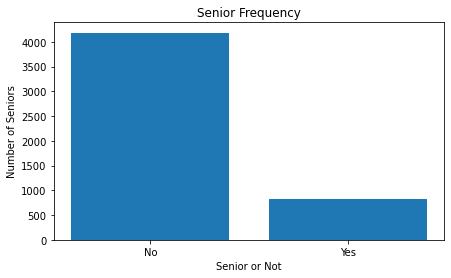

In [7]:
fig, ax = plt.subplots(figsize=(7,4))

ax.set_ylabel("Number of Seniors")
ax.set_xlabel("Senior or Not")
ax.set_title("Senior Frequency")
ax.bar(senior_counts.index, senior_counts, color=["C0"]);

In [8]:
contract_counts = churn_df.Contract.value_counts()
contract_counts

Month-to-month    2768
Two year          1186
One year          1046
Name: Contract, dtype: int64

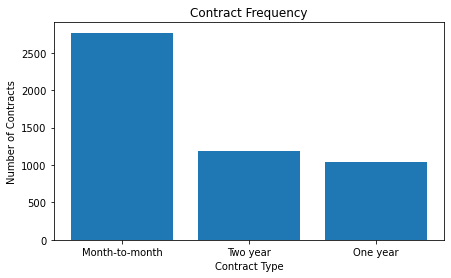

In [9]:
fig, ax = plt.subplots(figsize=(7,4))

ax.set_ylabel("Number of Contracts")
ax.set_xlabel("Contract Type")
ax.set_title("Contract Frequency")
ax.bar(contract_counts.index, contract_counts, color=["C0"]);

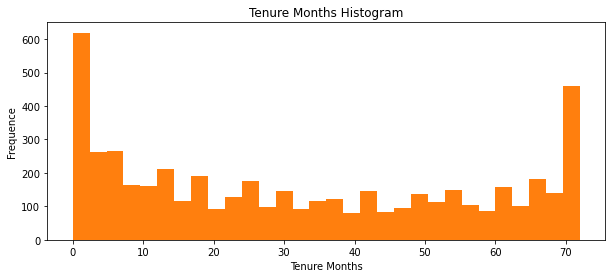

In [10]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Tenure Months")
ax.set_title("Tenure Months Histogram")
ax.hist(churn_df.Tenure_Months, bins=30, color="C1");

In [11]:
churn_df.Tenure_Months.corr(churn_df.Churn_Value)

-0.3611694172514247

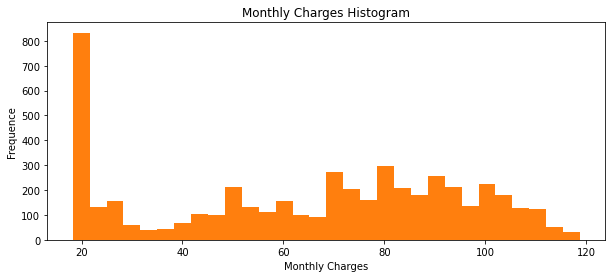

In [12]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("Monthly Charges")
ax.set_title("Monthly Charges Histogram")
ax.hist(churn_df.Monthly_Charges, bins=30, color="C1");

In [13]:
churn_df.Monthly_Charges.corr(churn_df.Churn_Value)

0.19828752555678536

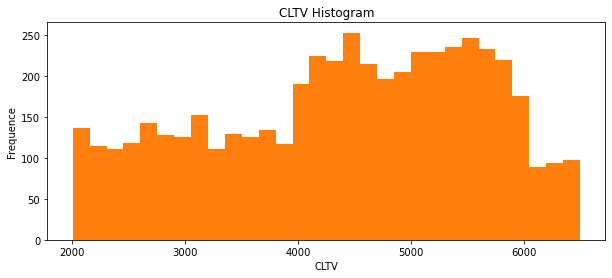

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_ylabel("Frequence")
ax.set_xlabel("CLTV")
ax.set_title("CLTV Histogram")
ax.hist(churn_df.CLTV, bins=30, color="C1");

In [15]:
churn_df.CLTV.corr(churn_df.Churn_Value)

-0.12713559861200388

### Create a dataframe, named X, of only those fields

In [16]:
X_df = churn_df[['Senior_Citizen','Tenure_Months','Contract','Monthly_Charges','CLTV']]
X_df

,Senior_Citizen,Tenure_Months,Contract,Monthly_Charges,CLTV
0,No,3,Month-to-month,85.80,5641
1,No,23,Month-to-month,90.60,4359
2,No,47,Month-to-month,106.40,4804
3,No,5,Month-to-month,85.75,3608
4,No,25,Month-to-month,104.95,3642
...,...,...,...,...,...
4995,Yes,72,Two year,117.35,4008
4996,Yes,4,Month-to-month,50.95,2104
4997,No,1,Month-to-month,35.05,3706
4998,No,58,Two year,24.35,6190


#### Create Dummy Variables for categorical variables in X_df and clean the data set

In [17]:
X_df = pd.get_dummies(X_df, prefix_sep='_', drop_first=True)
X_df.columns

Index(['Tenure_Months', 'Monthly_Charges', 'CLTV', 'Senior_Citizen_Yes',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [18]:
X_df.columns = [s.strip().replace(' ', '_') for s in X_df.columns]
X_df

,Tenure_Months,Monthly_Charges,CLTV,Senior_Citizen_Yes,Contract_One_year,Contract_Two_year
0,3,85.80,5641,0,0,0
1,23,90.60,4359,0,0,0
2,47,106.40,4804,0,0,0
3,5,85.75,3608,0,0,0
4,25,104.95,3642,0,0,0
...,...,...,...,...,...,...
4995,72,117.35,4008,1,0,1
4996,4,50.95,2104,1,0,0
4997,1,35.05,3706,0,0,0
4998,58,24.35,6190,0,0,1


List your (up to five) potential predictors and your analytically supported reasoning for choosing them:

1. senior citizen
2. tenure months
3. contract
4. monthly charge
5. CLTV

#### Create a dataframe, named y, of only the Churn Value field (our target)

In [19]:
y_df = churn_df['Churn_Value']
y_df

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: Churn_Value, Length: 5000, dtype: int64

### Using a random_state=1, partition your X and y, into 3000 training records (named train_X, train_y) and the remainder in (valid_X, valid_y). (I have 2000 other customers that I held out to check also!)

In [20]:
train_X, valid_X, train_y, valid_y = train_test_split(X_df,y_df,train_size=0.6,random_state=1)
print(train_X.shape, train_y.shape, valid_X.shape,valid_y.shape)

(3000, 6) (3000,) (2000, 6) (2000,)


### Using your training data (train_X, train_y), create a decision tree classifier for customer churn.

In [21]:
classTree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=10, min_samples_leaf=10)
classTree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=0)

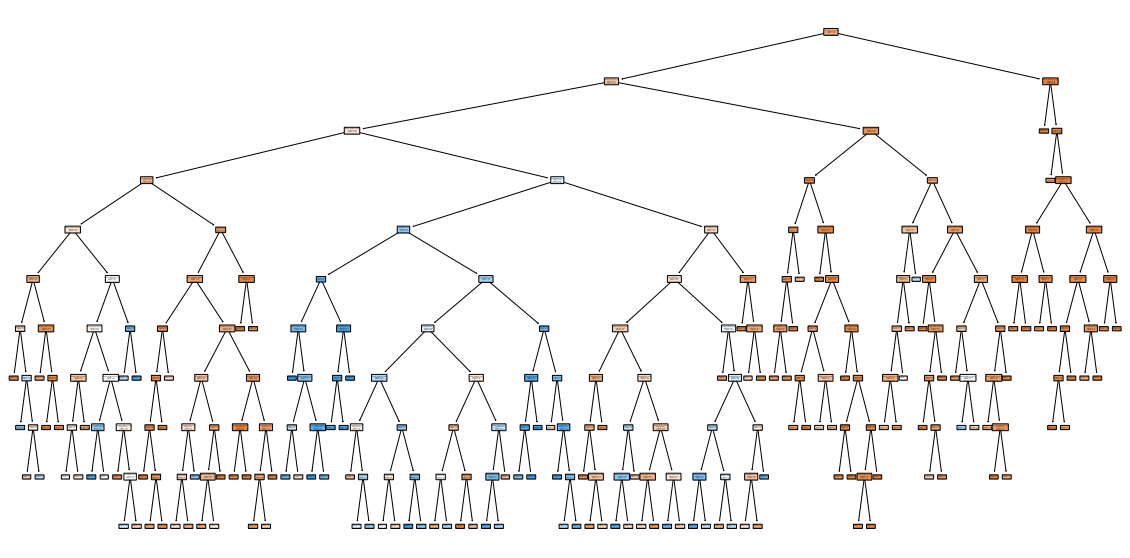

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(classTree, filled=True,feature_names=train_X.columns.tolist(), proportion=False, rounded=True)
plt.show()

### Using your fit model, compute the churn prediction for each record and classify the record using the default cutoff of 0.5.

In [23]:
dt_pred_proba = classTree.predict_proba(train_X)
dt_result1 = pd.DataFrame({'Actual Class': train_y, 
                             'p(Class = 0)': [p[0] for p in dt_pred_proba],
                             'p(Class = 1)': [p[1] for p in dt_pred_proba]})
dt_result1.sample(10,random_state=27)

,Actual Class,p(Class = 0),p(Class = 1)
1148,1,0.105263,0.894737
3712,0,1.000000,0.000000
1295,1,0.000000,1.000000
2087,1,0.277778,0.722222
4117,0,0.900000,0.100000
4258,0,1.000000,0.000000
4516,0,0.600000,0.400000
1888,0,1.000000,0.000000
815,0,0.884058,0.115942
4445,0,0.609756,0.390244


In [24]:
dt_pred = classTree.predict(train_X)
dt_result2 = pd.DataFrame({'Actual Class': train_y, 
                             'p(Class = 0)': [p[0] for p in dt_pred_proba],
                             'p(Class = 1)': [p[1] for p in dt_pred_proba],
                          'Predicted Class (default 0.5 cutoff)': dt_pred })
dt_result2.head(10)

,Actual Class,p(Class = 0),p(Class = 1),Predicted Class (default 0.5 cutoff)
4522,0,1.000000,0.000000,0
2851,1,0.500000,0.500000,0
2313,0,1.000000,0.000000,0
982,0,1.000000,0.000000,0
1164,0,0.571429,0.428571,0
1779,0,1.000000,0.000000,0
2146,0,0.852941,0.147059,0
4544,0,1.000000,0.000000,0
2363,0,0.900000,0.100000,0
1918,0,1.000000,0.000000,0


### Check the performance of you model using a confusion matrix, accuracy, error rate, TPR (Sensitivity, Recall), TNR (Specificity), FPR, Precision.


In [25]:
dt_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

[[2044  152]
 [ 349  455]]


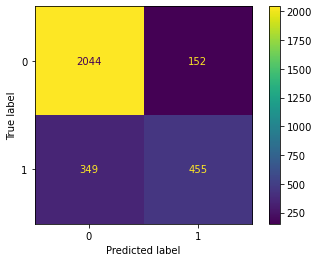

In [26]:
# Confusion Matrix from sklearn
cm = confusion_matrix(train_y, dt_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [27]:
TN = cm[0][0] #True negatives
FP = cm[0][1] #False Positives
FN = cm[1][0] #False Negatives
TP = cm[1][1] #True Positives

print("The accuracy as a percentege is {:.2f}%".format(100*(TN+TP)/(TN+FN+TP+FP)))
print("The sensitivity or true positive rate is {:.3f}".format((TP)/(FN+TP)))
print("The specificity or true negative rate is {:.3f}".format((TN)/(TN+FP)))
print("(1-Specificity) or false positive rate is {:.3f}".format((FP)/(TN+FP)))
print("The precision is {:.3f}".format((TP)/(FP+TP)))
print("The error rate is {:.3f}".format((FN + FP)/(TN + FN + TP + FP )))

The accuracy as a percentege is 83.30%
The sensitivity or true positive rate is 0.566
The specificity or true negative rate is 0.931
(1-Specificity) or false positive rate is 0.069
The precision is 0.750
The error rate is 0.167


### Check the performance using the ROC and AUC for the training and validation data

In [28]:
# The ‘roc_auc_score(true_y, predict_prob_y)’ function will compute the area under the curve for your directly. Use only the target class probabilities.
roc_auc_score(train_y, dt_pred_proba[:,1])

0.9017531876138434

### OK, this looks like decent accuracy. How will this model perform with new data?
### Check for model bias: Now, apply your model to your holdout validation data (valid_X) and compare the performance metrics (using valid_y). 


In [29]:
valid_X.head()

,Tenure_Months,Monthly_Charges,CLTV,Senior_Citizen_Yes,Contract_One_year,Contract_Two_year
2764,24,49.70,2911,0,0,0
4767,68,110.00,5034,0,0,1
3814,1,79.20,4363,1,0,0
3499,1,45.85,3706,0,0,0
2735,3,75.30,5387,0,0,0


In [30]:
valid_pred = classTree.predict(valid_X)

[[1309  157]
 [ 292  242]]


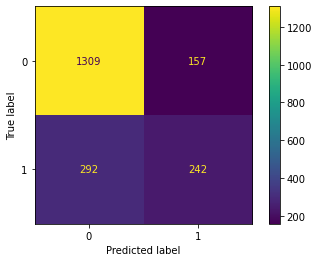

In [31]:
# Confusion Matrix from sklearn
cm = confusion_matrix(valid_y, valid_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [32]:
accuracy_score(valid_y, valid_pred)

0.7755

In [33]:
valid_pred_prob = classTree.predict_proba(valid_X)

In [34]:
valid_pred_prob[:,1]

array([0.46666667, 0.        , 1.        , ..., 0.        , 0.3902439 ,
       0.35294118])

In [35]:
roc_auc_score(valid_y,valid_pred_prob[:,1])

0.8042854004118318